In [68]:
#Importing the libraries used to work and the dataframe to work with.
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, Normalizer, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv(r'C:\Users\Samu\Documents\Ironhack\lab-customer-analysis-final-round\files_for_lab\csv_files\marketing_customer_analysis.csv')

In [69]:
#Checking the shape of the dataframe
df.shape

(9134, 24)

In [70]:
#Standarizing column names.
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [71]:
#Checking the dataframe.
df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [72]:
#Making a copy.
df1 = df.copy()

In [73]:
#Dropping duplicates
df1 = df1.drop_duplicates()

In [74]:
#Checking dtypes
df1.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [75]:
#New copy
df2 = df1.copy()

In [76]:
#Dropping irrelevant categorical columns
df2 = df1.drop(['customer', 'education', 'location_code', 'effective_to_date', 'marital_status', 'renew_offer_type', 'employmentstatus', 'sales_channel'], axis=1)

In [77]:
#Checking for NaNs
df2.isna().sum()

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
gender                           0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [78]:
#Separating categoricals from numericals
numericals = df2.select_dtypes('number')
categoricals = df2.select_dtypes('object')

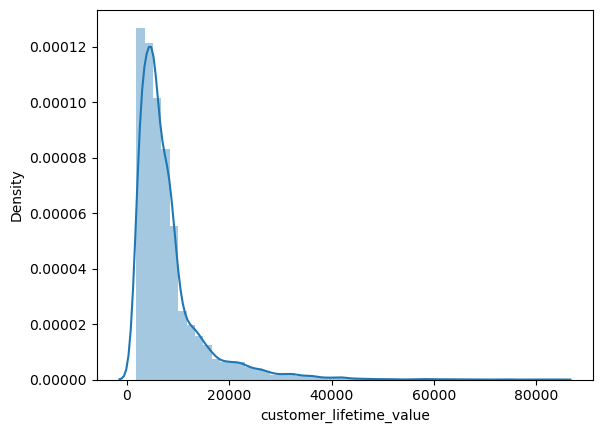

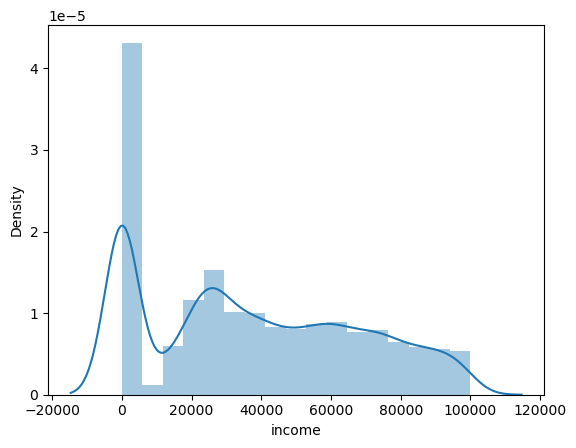

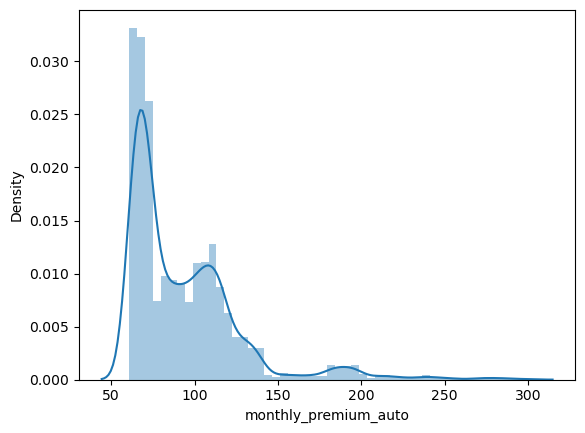

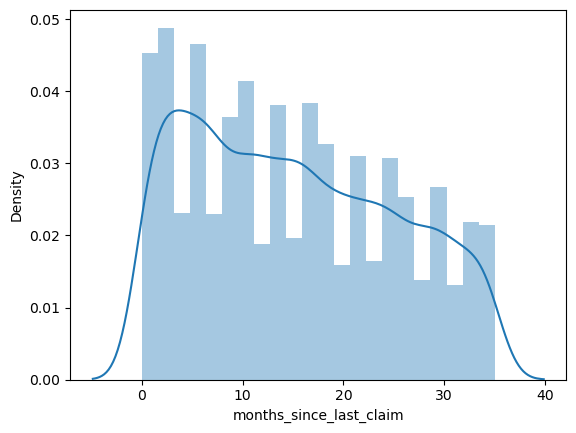

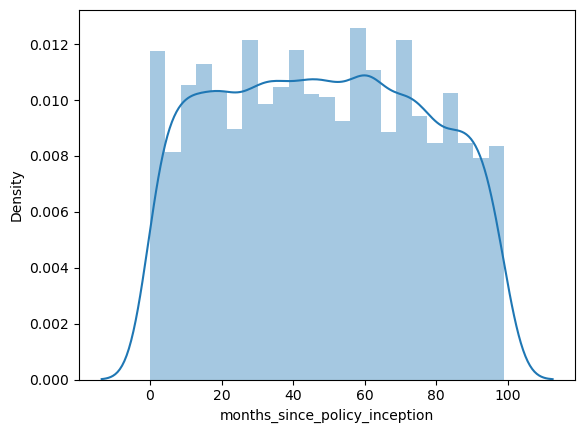

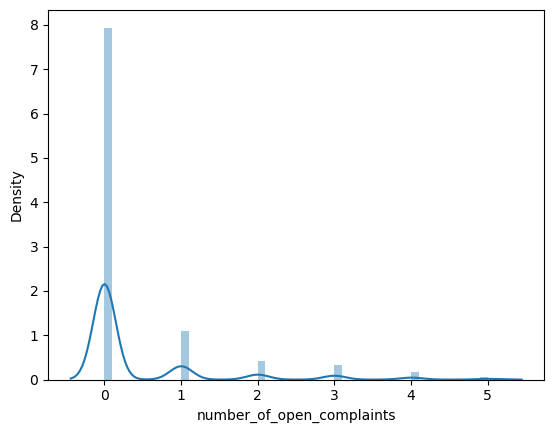

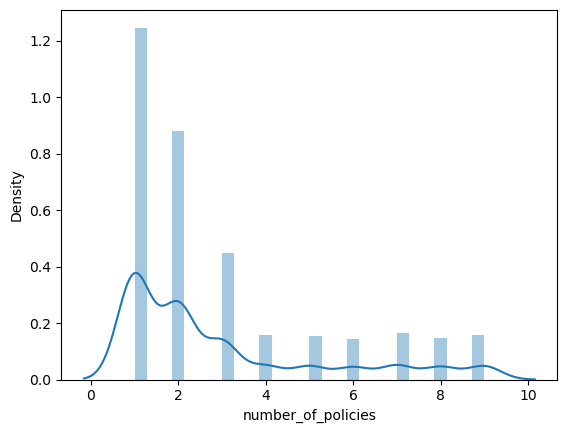

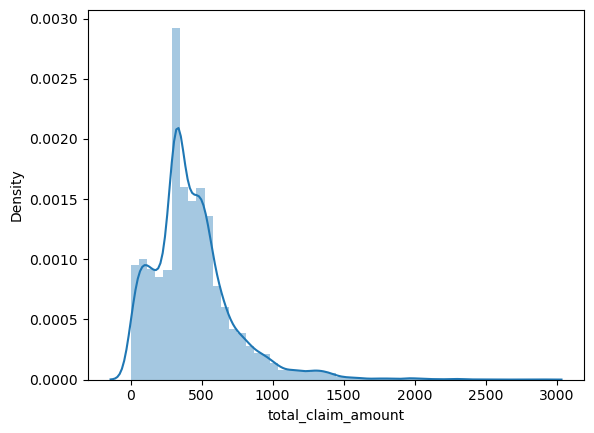

In [79]:
#Plotting numericals to check that everything is right
for col in numericals.columns:
    sns.distplot(numericals[col])
    plt.show()

<Axes: >

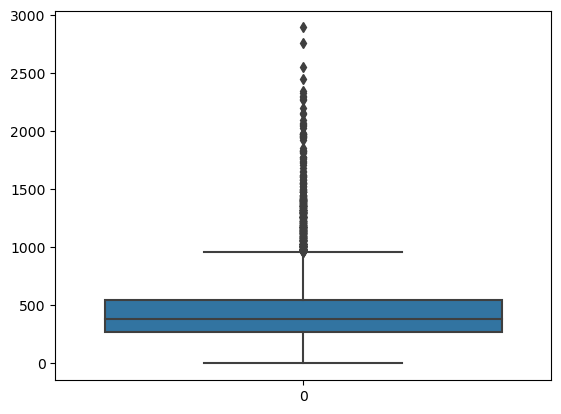

In [80]:
#Checking for outliers in the target.
sns.boxplot(numericals['total_claim_amount'])

In [81]:
#Getting the data to further check the outliers

IQR = abs(np.quantile(numericals["total_claim_amount"], .25) - np.quantile(numericals["total_claim_amount"], .75)) * 1.5
lower_boundary = np.quantile(numericals["total_claim_amount"], .25) - IQR
upper_boundary = np.quantile(numericals["total_claim_amount"], .75) + IQR

# Outliers for this column are values smaller than lower_boundary or bigger than upper_boundary:
lower_boundary, upper_boundary

(-140.62664687499995, 960.3997301249999)

In [82]:
#Printing the outliers
numericals[(numericals["total_claim_amount"] > 960)].sort_values("total_claim_amount")

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
4536,3123.080994,0,101,1,83,4,1,960.115399
5207,3123.080994,0,101,1,83,4,1,960.115399
4314,3123.080994,0,101,1,83,4,1,960.115399
8608,3123.080994,0,101,1,83,4,1,960.115399
2328,3123.080994,0,101,1,83,4,1,960.115399
...,...,...,...,...,...,...,...,...
248,8672.229719,0,245,34,83,0,1,2345.413441
9049,32104.699570,89546,266,4,18,1,2,2452.894264
4930,43217.216110,51504,220,30,99,0,2,2552.343856
5074,9295.411150,0,261,33,44,0,1,2759.794354


In [83]:
#Dropping the outliers
numericals = numericals[(numericals["total_claim_amount"] > 960)]

In [84]:
#Checking correlations
corr_matrix = numericals.corr()
corr_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.218028,0.330256,0.023186,0.059995,-0.112760,0.039813,0.095597
income,0.218028,1.000000,0.432092,0.001238,0.020762,0.032026,-0.027691,-0.085211
monthly_premium_auto,0.330256,0.432092,1.000000,0.061207,0.025966,-0.030858,-0.007964,0.424582
months_since_last_claim,0.023186,0.001238,0.061207,1.000000,0.063664,-0.107381,0.060512,0.045881
months_since_policy_inception,0.059995,0.020762,0.025966,0.063664,1.000000,0.100606,0.039922,0.073284
number_of_open_complaints,-0.112760,0.032026,-0.030858,-0.107381,0.100606,1.000000,-0.081276,-0.040669
number_of_policies,0.039813,-0.027691,-0.007964,0.060512,0.039922,-0.081276,1.000000,-0.038381
total_claim_amount,0.095597,-0.085211,0.424582,0.045881,0.073284,-0.040669,-0.038381,1.000000


In [85]:
#Checking correlations with the target
corr_matrix['total_claim_amount'].sort_values(ascending = False)

total_claim_amount               1.000000
monthly_premium_auto             0.424582
customer_lifetime_value          0.095597
months_since_policy_inception    0.073284
months_since_last_claim          0.045881
number_of_policies              -0.038381
number_of_open_complaints       -0.040669
income                          -0.085211
Name: total_claim_amount, dtype: float64

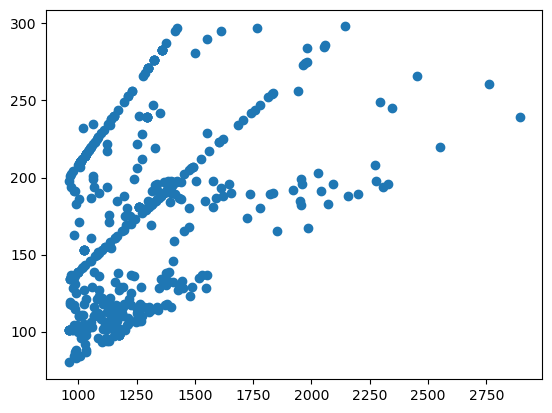

In [86]:
#Plotting the target with the main correlated feature.
plt.scatter(numericals['total_claim_amount'], numericals['monthly_premium_auto'])

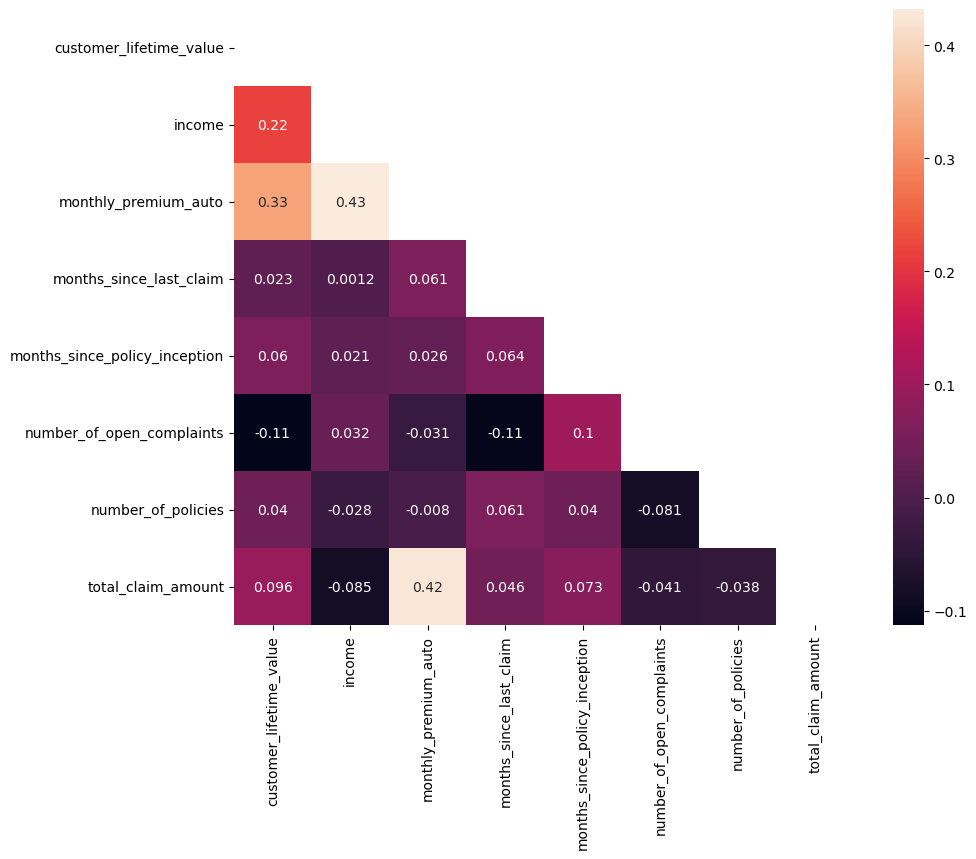

In [87]:
#Creating a heatmap to further check correlations and multicolinearity

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, mask=mask, annot=True)
plt.show()

As we can see we don't have any high correlation values, so it's not necessary to drop anything.

In [88]:
#Encoding the categoricals with OneHotEncoder
categoricals1 = categoricals.copy()
ohe = OneHotEncoder()

In [89]:
#Saving the array in a variable
categoric_array = ohe.fit_transform(categoricals1[['state', 'response', 'coverage', 'gender', 'policy_type', 'policy', 'vehicle_class', 'vehicle_size']]).toarray()

In [90]:
#SAving the categories in a variable
categoric_labels = ohe.categories_

In [91]:
#Unifying the arrays in only one using hstack(), because the arrays are irregular
categoric_final = np.hstack(categoric_labels)

In [92]:
#Creating a new dataframe with the encoded categoricals.
encoded_categoricals =pd.DataFrame(categoric_array, columns = categoric_final)

In [93]:
#Concatenating the numericals with the encoded categoricals
df_final = pd.concat([numericals, encoded_categoricals], axis = 1).reset_index(drop=True)

In [94]:
#Dropping NaNs from the final DF
df_final = df_final.dropna().reset_index(drop=True)

In [96]:
#Splitting the data
X = df_final.drop(['total_claim_amount'], axis = 1)
y= df_final['total_claim_amount']

In [97]:
#Creating the test an train variables.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [98]:
#Scaling the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [99]:
#Creating and fitting the model.
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [100]:
#Getting the results

predict = lm.predict(X_test_scaled)
rmse = mean_squared_error(y_test, predict, squared=False)
mae = mean_absolute_error(y_test, predict)
print("R2_score:", round(r2_score(y_test, predict), 2))
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.27
RMSE: 278.7591551063135
MAE: 196.27406815943044


<Axes: xlabel='total_claim_amount'>

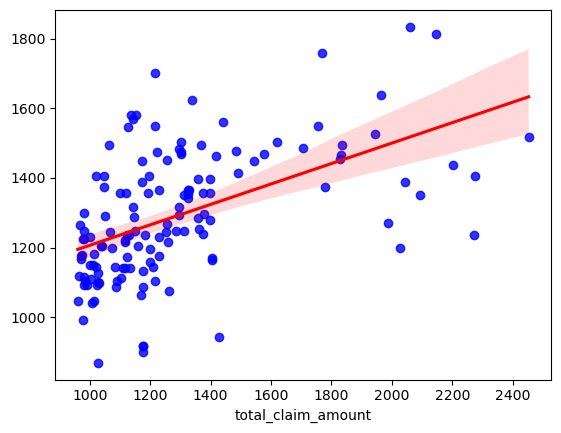

In [101]:
#Plotting the predictions to check the results. As we can see, the dots are scattered all around the grph, showing that it's really inaccurate.
#explaining the R2 score.

sns.regplot(x=y_test, y=predict, line_kws={"color": "red"}, scatter_kws={"color": "blue"})

After doing all the preparation, we can see that we still have to work on the model and do further investigation on what is causing those bad results.

From the ecploration of the data, we can see that the dataframe has some values that are not normally shaped and will need further investigation with the correspondent sectors of the compny to check for data fiability. Also, we can see that Total Claim Amount is lightly tied with Monthly Premium Auto and only a little bit with Customer Lifetime Value.